## DO NOT ALTER THE CODE FROM HERE THROUGH PLOTTING

In [15]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sbn
from scipy import stats

In [16]:
# Importing the cleaned/combined data from the csv with the years 2008-2018

firefile = '../output/all_with_no_incident_nulls.csv'
df = pd.read_csv(firefile, skip_blank_lines=True, encoding='UTF-8')
len(df)


/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


159803

In [17]:
df['arrive_date_time'] = pd.to_datetime(df['arrive_date_time'])
df['cleared_date_time'] = pd.to_datetime(df['cleared_date_time'])
df['dispatch_date_time'] = pd.to_datetime(df['dispatch_date_time'])
df.dtypes

OBJECTID                              int64
address                              object
address2                             object
apt_room                             object
arrive_date_time             datetime64[ns]
cleared_date_time            datetime64[ns]
dispatch_date_time           datetime64[ns]
exposure                              int64
incident_number                      object
incident_type                       float64
incident_type_description            object
platoon                              object
station                             float64
Longitude                            object
Latitude                             object
Year                                float64
Date                                 object
dtype: object

In [18]:
# The total number of rows with the years 2008-2018 and incident type not null
len(df['dispatch_date_time'].unique())

154071

In [19]:
years = df.groupby('Year')['OBJECTID'].count()
years

Year
2008.0    13705
2009.0    13028
2010.0    13531
2011.0    13893
2012.0    13607
2013.0    13943
2014.0    14415
2015.0    15130
2016.0    15746
2017.0    18151
2018.0    14654
Name: OBJECTID, dtype: int64

In [20]:
# Create data frame to hold Fire Incidents
incident = years
incident_df = pd.DataFrame({'Year':incident.index, 'Incident Count':incident.values})
incident_df

,Year,Incident Count
0,2008.0,13705
1,2009.0,13028
2,2010.0,13531
3,2011.0,13893
4,2012.0,13607
5,2013.0,13943
6,2014.0,14415
7,2015.0,15130
8,2016.0,15746
9,2017.0,18151


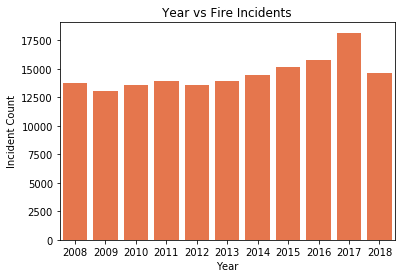

In [21]:
#Generate seaborn bar plot - Year vs Fire Incidents
incident_barplot = sbn.barplot(x=incident_df["Year"].astype(np.int64), y=incident_df["Incident Count"], data=incident_df, color='orangered', alpha=0.8)
incident_barplot.set(ylabel='Incident Count')
plt.title('Year vs Fire Incidents')
plt.savefig('bar_year_vs_fireincidents.png', bbox_inches='tight')
plt.show()

In [22]:
#Scaled fire incidents to hundreds
incident_scaled100 = incident_df['Incident Count']/100
incident_df['Incident Count/100'] = incident_scaled100
incident_df

,Year,Incident Count,Incident Count/100
0,2008.0,13705,137.05
1,2009.0,13028,130.28
2,2010.0,13531,135.31
3,2011.0,13893,138.93
4,2012.0,13607,136.07
5,2013.0,13943,139.43
6,2014.0,14415,144.15
7,2015.0,15130,151.30
8,2016.0,15746,157.46
9,2017.0,18151,181.51


In [23]:
#Save Wake County Population Data to csv file
incident_df.to_csv('fireincident.csv', encoding='utf-8', index=False)

In [24]:
# Read the Wake County Population and Fire Incidents CSVs
wakecountypop_to_load = pd.read_csv('wakecountypopulation.csv')
firecincident_to_load = pd.read_csv('fireincident.csv')

In [25]:
wakecountypop_to_load

,Year,Population
0,2009,828759.0
1,2010,850546.0
2,2011,879658.0
3,2012,905573.0
4,2013,929214.0
5,2014,952513.0
6,2015,976019.0
7,2016,998576.0
8,2017,1023811.0
9,2018,1048192.5


In [26]:
# Combine the data into a single dataset
wakecountypop_incident_df = pd.merge(wakecountypop_to_load, firecincident_to_load, how='left', on='Year')

# Display the data table for preview
wakecountypop_incident_df
wakecountypop_incident_df.dropna()
scaled1k_pop = wakecountypop_incident_df['Population']/1000
wakecountypop_incident_df['Population/1000'] = scaled1k_pop
wakecountypop_incident_df.dropna()
yr_scaled = incident_df['Year'].astype(np.int64)

#Create data frame to hold city weather data
column_names = ('Year', 'Population/1000', 'Incident Count/100')
wakecountypop_incident_scaled = pd.DataFrame(columns = column_names)
wakecountypop_incident_scaled['Population/1000'] = scaled1k_pop
wakecountypop_incident_scaled['Incident Count/100'] = incident_scaled100
wakecountypop_incident_scaled["Year"] = yr_scaled.astype(np.int64)
cleaned_wakecounty_scaled = wakecountypop_incident_scaled.dropna()
cleaned_wakecounty_scaled

,Year,Population/1000,Incident Count/100
0,2008.0,828.7590,137.05
1,2009.0,850.5460,130.28
2,2010.0,879.6580,135.31
3,2011.0,905.5730,138.93
4,2012.0,929.2140,136.07
5,2013.0,952.5130,139.43
6,2014.0,976.0190,144.15
7,2015.0,998.5760,151.30
8,2016.0,1023.8110,157.46
9,2017.0,1048.1925,181.51


In [27]:
#Save to CSV - wake county scaled data
cleaned_wakecounty_scaled.to_csv('cleaned_wakecounty_scaled.csv', encoding='utf-8', index=False)

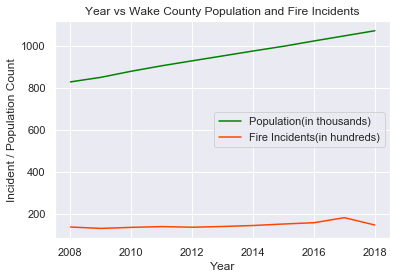

In [28]:
#Generate seaborn line plot - Year vs Wake County Population/Fire Incidents
sbn.set(style = 'darkgrid')
pop_plot = sbn.lineplot(x=cleaned_wakecounty_scaled["Year"], y=cleaned_wakecounty_scaled["Population/1000"], data=cleaned_wakecounty_scaled, label='Population(in thousands)', color='green')
inc_plot = sbn.lineplot(x=cleaned_wakecounty_scaled["Year"].astype(np.int64), y=cleaned_wakecounty_scaled["Incident Count/100"], data=cleaned_wakecounty_scaled, label='Fire Incidents(in hundreds)', color='orangered') 
inc_plot.set(ylabel='Incident / Population Count')
plt.title('Year vs Wake County Population and Fire Incidents')
plt.savefig('line_year_vs_wakecounty_pop_inc.png', bbox_inches='tight')
plt.show()

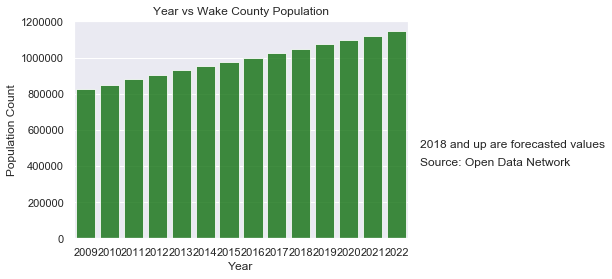

In [29]:
#Generate seaborn bar plot - Year vs Wake County Population
wakecountypopulation_barplot = sbn.barplot(x=wakecountypop_to_load["Year"].astype(np.int64), y=wakecountypop_to_load["Population"], data=wakecountypop_to_load, color='green', alpha=0.8)
plt.title('Year vs Wake County Population')
wakecountypopulation_barplot.set(ylabel='Population Count')
plt.text(14,500000, '2018 and up are forecasted values')
plt.text(14,400000, 'Source: Open Data Network')
plt.savefig('bar_year_vs_wakecounty_pop.png', bbox_inches='tight')
plt.show()

In [ ]:
#Generate seaborn bar plot - Year vs Wake County Population/Fire Incidents
pop_barplot = sbn.barplot(x=cleaned_wakecounty_scaled["Year"].astype(np.int64), y=cleaned_wakecounty_scaled["Population/1000"], data=cleaned_wakecounty_scaled, color='green', alpha=0.8)
inc_barplot = sbn.barplot(x=cleaned_wakecounty_scaled["Year"].astype(np.int64), y=cleaned_wakecounty_scaled["Incident Count/100"], data=cleaned_wakecounty_scaled, color='orangered', alpha=0.8)
inc_barplot.set(ylabel='Fire Incidents / Population Count')
plt.title('Year vs Wake County Population and Fire Incidents')
plt.text(10.9,500, 'Wake County Population(in thousands)')
plt.text(10.9,45, 'Fire Incidents(in hundreds)')
plt.savefig('bar_year_vs_wakecounty_pop_inc.png', bbox_inches='tight')
plt.show()